In [261]:
#Импорт необходимых инструментов для проекта
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [262]:
# Функция переименования столбцов в датафрейме
def data_columns_rename(df:object, columns_dict:dict):
    df.rename(columns=columns_dict, inplace=True)

# Функция объеднения датасетов и удаление ненужных столбцов
def concat_and_drop(data1:object, data2:object) -> object:
    # Определяем наименование колонок, которые не попадают в оба датасета и должны быть удалены
    list_cols_drop = list(set(data1.columns) ^ set(data2.columns))
    # Объединяем два дата сета
    df = pd.concat([data1, data2], ignore_index=True)
    # Удаляем лишние колонки
    df.drop(columns=list_cols_drop, inplace=True)
    return df

# Функция очистки данных от пустых значений
def clean_nan(data):
    cols_null_percent = data.isnull().mean() * 100
    cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
    
    for index, values in cols_with_null.items():
        if values >= 30:
            data.drop(columns=[index], inplace = True)
    data = data.dropna(how='any', axis=0)
    return data

# Функция построения двух графиков для анализа результатов первого датасета и объединенного
# К сожалению, я так и не придумал как сделать все отображения одной функцией
def draw_graph_compare(data1:object, data2:object) -> None:
    # Делаем выборки по пациентам в обоих датасетах, у которых подтвержден диабет
    data1_sort = data1[data1['Diabetes'] == 1]
    data2_sort = data2[data2['Diabetes'] == 1]
    
    fig, axes = plt.subplots(3, 2, figsize=(20,15))
    
    fig.suptitle('Compare Dataset 1 and Dataset 1+2')
        
    # Построим коробочные диаграммы возрастов в выборке обоих датасетов
    # Слева: датасет 1. Справа: датасет 1+2
    sns.boxplot(data=data1, x='Age', ax=axes[0][0]);
    axes[0][0].set_title('Dataset 1. Boxplot of patients by age')
    sns.boxplot(data=data2, x='Age', hue='Sex', gap=.1, ax=axes[0][1]);
    axes[0][1].set_title('Dataset 1 and Dataset2. Boxplot of patients by age')
    
    # Построим коробочные диаграммы двух датасетов по возрасту пациентов у которых подтвержден диабет
    sns.boxplot(data=data1_sort, x='Age', ax=axes[1][0]);
    axes[1][0].set_title('Dataset 1. Boxplot of patients with diabet by age')
    sns.boxplot(data=data2_sort, x='Age', ax=axes[1][1]);
    axes[1][1].set_title('Dataset 1 and Dataset2. Boxplot of patients with diabet by age')
    
    # Построим гистограммы распределения BMI в обоих датасетах
    sns.histplot(data=data1_sort, x='BMI', alpha=1, ax=axes[2][0]);
    sns.histplot(data=data2_sort, x='BMI', color='orange', alpha=0.3, ax=axes[2][0]);
    axes[2][0].set_title('Dataset 1 and Dataset 1+2. Histogram of patients with diabet by BMI');
    
    # Построим гистограмму распределения Glucose относительно BMI в обоих датасетах
    sns.histplot(data=data2_sort, x='BMI', y='Glucose', ax=axes[2][1]);
    axes[2][0].set_title('Dataset 1 and Dataset 1+2. Histogram of patients with diabet by Glucose of BMI');
    
    # Построим категориальный график по полу по наличию диабета
    sns.catplot(data=data2_sort, x='Age', y='Sex');

In [268]:
# Импортируем все необходимые датасеты в проект
diabets_data = pd.read_csv('datasets/diabetes.csv')
test_data = pd.read_csv('datasets/test.csv')
health_indicators_data = pd.read_csv('datasets/diabetes_012_health_indicators_BRFSS2015.csv')

display(health_indicators_data.head(10))
display(health_indicators_data['HighBP'].value_counts())

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64

# Анализ датасета 1

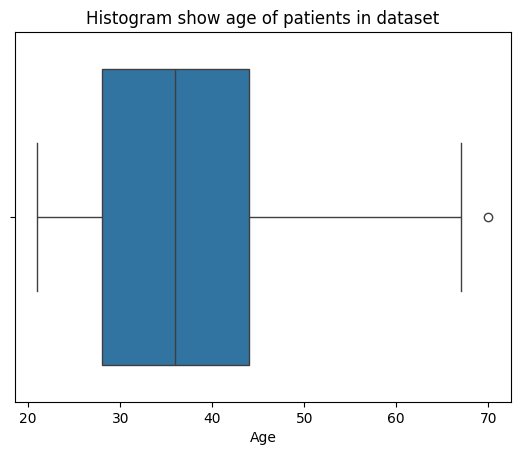

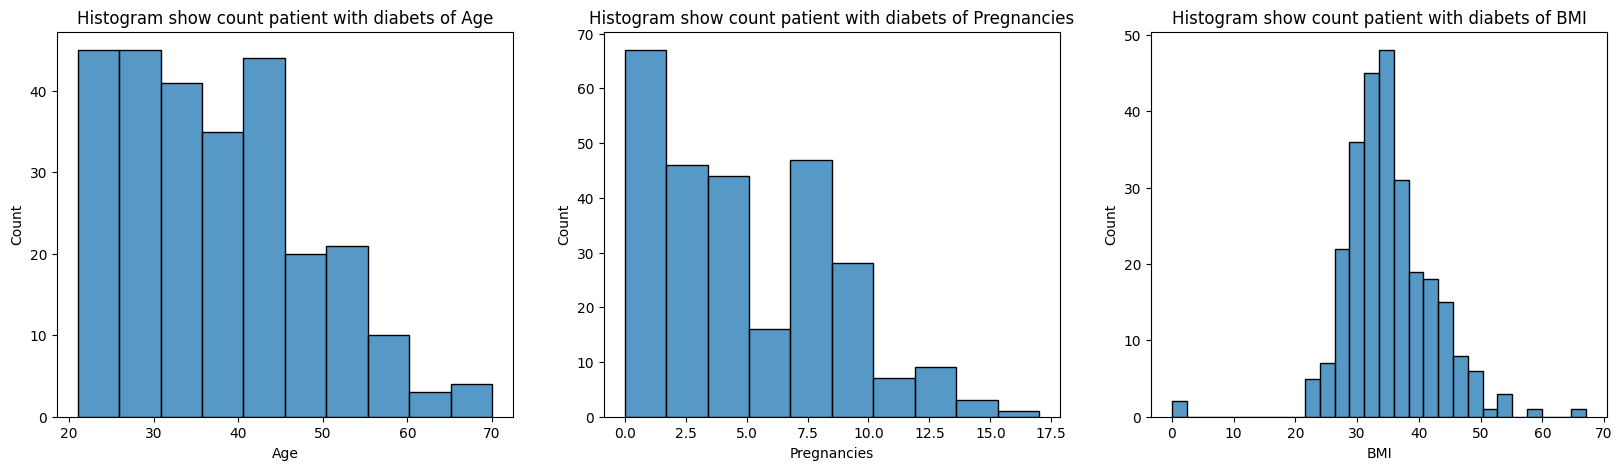

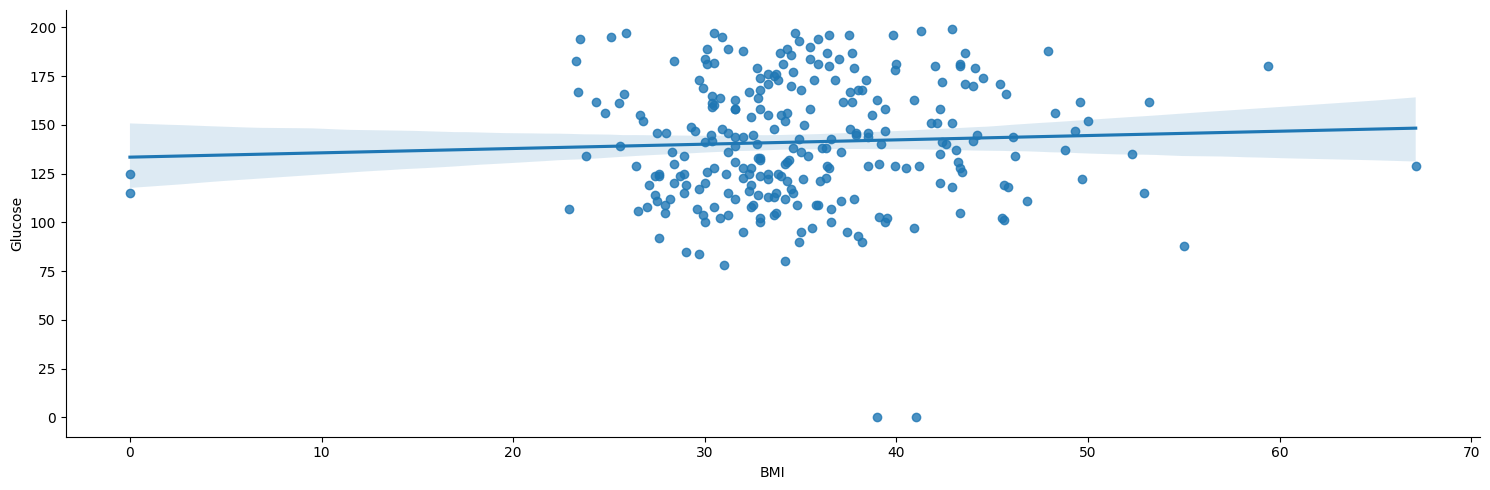

In [264]:
diabets_data_sort = diabets_data[diabets_data['Outcome'] == 1]

list_columns = ['Age', 'Pregnancies', 'BMI']

fig, ax = plt.subplots()
sns.boxplot(
        data=diabets_data_sort,
        x='Age',
        ax=ax
    );
ax.set_title(f'Histogram show age of patients in dataset')

fig, axes = plt.subplots(1, len(list_columns), figsize=(20,5))
for index, name in enumerate(list_columns):
    sns.histplot(
        data=diabets_data_sort,
        x=name,
        ax=axes[index]
    );
    axes[index].set_title(f'Histogram show count patient with diabets of {name}')

sns.lmplot(
    data=diabets_data_sort,
    x='BMI',
    y='Glucose',
    aspect=3,
    height=5
);

# Вывод:
По первому датасету можно обратить внимание, что основной возраст развития диабета среди женщин попадает в диапазон 28 - 44 лет. При этом в данном датасете особо не наблюдается развитие диабета с количеством беременности и показателем функции развития диабета. Стоит также отметить, что у пациентов с диабетом индекс массы тела варьирует в пределах 20 - 55, что соответствует избыточной массе тела. Из данного дата сета можно сделать вывод, что диабет развивается с избыточным весом.

# 2. Объединение датасета 1 и датасета 2

In [265]:
# Добавим колонку sex в датасет 1
diabets_data['Sex'] = 'F'
# Переименуем столбец Outcome в Diabets
data_columns_rename(diabets_data, {'Outcome': 'Diabetes'})


# Переименуем столбцы в датасете 2, чтоб они бились с датасет 1
# Словарь содержит список переименованных столбцов
columns_dict = {
        'sex': 'Sex', 
        'diabetes': 'Diabetes', 
        'diaBP': 'BloodPressure', 
        'glucose': 'Glucose',
        'age': 'Age'
    }
# Вызывается функция переименования столбца
data_columns_rename(test_data, columns_dict)

# Объединяем датасет1 и датасет2, а также удаляем неповторяющиеся колонки
df_concat = concat_and_drop(diabets_data, test_data)
df_concat

,Glucose,BloodPressure,BMI,Age,Diabetes,Sex
0,148.0,72.0,33.60,50,1,F
1,85.0,66.0,26.60,31,0,F
2,183.0,64.0,23.30,32,1,F
3,89.0,66.0,28.10,21,0,F
4,137.0,40.0,43.10,33,1,F
...,...,...,...,...,...,...
1611,77.0,77.5,27.42,46,0,F
1612,70.0,67.0,23.08,58,0,F
1613,NaN,80.0,26.41,55,0,M
1614,92.0,104.5,22.86,45,0,F


# Комментарий:
Перед анализом полученных данных очистим их от пустых значений.
В ходе анализа были обнаружены

In [266]:
# Определяем критичность количества пустых значений
df_clean = clean_nan(df_concat)
df_clean

,Glucose,BloodPressure,BMI,Age,Diabetes,Sex
0,148.0,72.0,33.60,50,1,F
1,85.0,66.0,26.60,31,0,F
2,183.0,64.0,23.30,32,1,F
3,89.0,66.0,28.10,21,0,F
4,137.0,40.0,43.10,33,1,F
...,...,...,...,...,...,...
1610,83.0,91.0,24.30,49,0,F
1611,77.0,77.5,27.42,46,0,F
1612,70.0,67.0,23.08,58,0,F
1614,92.0,104.5,22.86,45,0,F


In [ ]:
draw_graph_compare(diabets_data, df_clean)

# Вывод